## Skorch backprop network

In [31]:

import subprocess

# Installation on Google Colab
!git clone https://github.com/jlm429/pyperch


fatal: destination path 'pyperch' already exists and is not an empty directory.


In [1]:
import numpy as np
from sklearn.datasets import make_classification
from torch import nn, optim
from skorch import NeuralNetClassifier
from pyperch.pyperch.neural.backprop_nn import BackpropModule
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from skorch.callbacks import EpochScoring,EarlyStopping
from skorch.callbacks import Callback
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, make_scorer
import torch



In [2]:
X1 = pd.read_csv('bankmarketing_X.csv')
X2 = pd.read_csv('breastcancer_X.csv')
Y1 = pd.read_csv('bankmarketing_Y.csv')
Y2 = pd.read_csv('breastcancer_Y.csv')

In [3]:
X1 = X1.map(lambda x: int(x) if isinstance(x, bool) else x)

In [4]:
X1

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,1.533700,0.011014,-0.568570,0.19593,-0.349533,0.648214,0.722036,0.886970,0.712496,0.331783,...,0,0,0,1,0,0,0,0,1,0
1,1.629750,-0.421650,-0.568570,0.19593,-0.349533,0.648214,0.722036,0.886970,0.712496,0.331783,...,0,0,0,1,0,0,0,0,1,0
2,-0.291242,-0.124194,-0.568570,0.19593,-0.349533,0.648214,0.722036,0.886970,0.712496,0.331783,...,0,0,0,1,0,0,0,0,1,0
3,-0.003093,-0.413924,-0.568570,0.19593,-0.349533,0.648214,0.722036,0.886970,0.712496,0.331783,...,0,0,0,1,0,0,0,0,1,0
4,1.533700,0.188715,-0.568570,0.19593,-0.349533,0.648214,0.722036,0.886970,0.712496,0.331783,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45302,-0.963589,-0.792505,-0.568570,0.19593,-0.349533,0.839270,0.590747,-0.475177,0.770731,0.844356,...,0,0,0,0,1,0,0,0,1,0
45303,-0.099143,-0.151235,-0.568570,0.19593,-0.349533,0.839270,0.590747,-0.475177,0.771308,0.844356,...,0,0,1,0,0,0,0,0,1,0
45304,-1.251737,-0.750011,-0.205228,0.19593,1.653035,-1.198669,-1.179930,-1.231926,-1.307303,-0.937905,...,0,0,0,1,0,0,0,1,0,0
45305,1.725799,1.042454,-0.568570,0.19593,-0.349533,0.839270,-0.228083,0.951835,0.775344,0.844356,...,0,0,1,0,0,0,0,0,1,0


In [5]:

Y1['y']

0        0
1        0
2        0
3        0
4        0
        ..
45302    0
45303    0
45304    0
45305    0
45306    0
Name: y, Length: 45307, dtype: int64

In [6]:
X_train, X_test, y_train, y_test = train_test_split(np.array(X1),np.array(Y1), test_size=0.20)

In [7]:
y_train

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]])

In [8]:
classes = np.unique(Y1)
classes
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(class_weight='balanced', classes=classes, y = Y1['y'])
#class_weights = dict(zip(np.unique(Y1), class_weights))

class_weights = torch.FloatTensor(class_weights)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(np.array(X1),np.array(Y1), test_size=0.20)


In [10]:
from sklearn.neural_network import MLPClassifier

def hyperNN(X_train, y_train, X_test, y_test, title):

    f1_test = []
    f1_train = []
    hlist = np.linspace(1,60,30).astype('int')
    for i in hlist:         
            clf = MLPClassifier(hidden_layer_sizes=(i,), solver='adam', activation='logistic', 
                                learning_rate_init=0.05, random_state=100,verbose=True)
            clf.fit(X_train, y_train)
            y_pred_test = clf.predict(X_test)
            y_pred_train = clf.predict(X_train)
            f1_test.append(f1_score(y_test, y_pred_test))
            f1_train.append(f1_score(y_train, y_pred_train))
      
    plt.plot(hlist, f1_test, 'o-', color='r', label='Test F1 Score')
    plt.plot(hlist, f1_train, 'o-', color = 'b', label='Train F1 Score')
    plt.ylabel('Model F1 Score')
    plt.xlabel('No. Hidden Units')
    
    plt.title(title)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()
    
def NNGridSearchCV(X_train, y_train):
    #parameters to search:
    #number of hidden units
    #learning_rate
    h_units = [5, 10, 20, 30, 40, 50, 75, 100]
    learning_rates = [0.01, 0.05, .1]
    param_grid = {'hidden_layer_sizes': h_units, 'learning_rate_init': learning_rates}

    net = GridSearchCV(estimator = MLPClassifier(solver='adam',activation='logistic',random_state=100),
                       param_grid=param_grid, cv=10)
    net.fit(X_train, y_train)
    print("Per Hyperparameter tuning, best parameters are:")
    print(net.best_params_)
    return net.best_params_['hidden_layer_sizes'], net.best_params_['learning_rate_init']

In [11]:
y_train.ravel().astype(np.int64)

array([0, 0, 0, ..., 1, 0, 0])

Iteration 1, loss = 0.43741579
Iteration 2, loss = 0.22325699
Iteration 3, loss = 0.20678118
Iteration 4, loss = 0.20396634
Iteration 5, loss = 0.20167220


Iteration 6, loss = 0.20079593
Iteration 7, loss = 0.19961376
Iteration 8, loss = 0.19989066
Iteration 9, loss = 0.19915843
Iteration 10, loss = 0.19978176
Iteration 11, loss = 0.19815131
Iteration 12, loss = 0.19865795
Iteration 13, loss = 0.19824427
Iteration 14, loss = 0.19693202
Iteration 15, loss = 0.19621969
Iteration 16, loss = 0.19723358
Iteration 17, loss = 0.19650233
Iteration 18, loss = 0.19683291
Iteration 19, loss = 0.19611906
Iteration 20, loss = 0.19543573
Iteration 21, loss = 0.19650307
Iteration 22, loss = 0.19586033
Iteration 23, loss = 0.19639017
Iteration 24, loss = 0.19681670
Iteration 25, loss = 0.19669534
Iteration 26, loss = 0.19737455
Iteration 27, loss = 0.19627511
Iteration 28, loss = 0.19642740
Iteration 29, loss = 0.19581633
Iteration 30, loss = 0.19663961
Iteration 31, loss = 0.19645824
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.21920743
Iteration 2, loss = 0.18846208
Iteration 3, loss = 

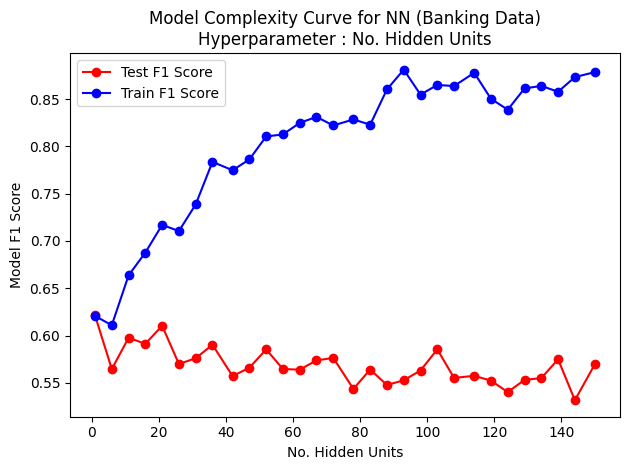

In [12]:
X_train, X_test, y_train, y_test = train_test_split(np.array(X_train),y_train.ravel().astype(np.int64), test_size=0.20)
hyperNN(X_train, y_train, X_test, y_test,title="Model Complexity Curve for NN (Banking Data)\nHyperparameter : No. Hidden Units")
h_units, learn_rate = NNGridSearchCV(X_train, y_train)
# estimator_bank = MLPClassifier(hidden_layer_sizes=(h_units,), solver='adam', activation='logistic', 
#                                learning_rate_init=learn_rate, random_state=100,verbose=True)
# train_samp_bank, NN_train_score_bank, NN_fit_time_bank, NN_pred_time_bank = plot_learning_curve(estimator_bank, X_train, y_train,title="Neural Net Banking Data")
# final_classifier_evaluation(estimator_bank, X_train, X_test, y_train, y_test)
                               

In [6]:





def get_activation_fn(name):
    if name == 'relu':
        return nn.ReLU()
    elif name == 'sigmoid':
        return nn.Sigmoid()
    elif name == 'tanh':
        return nn.Tanh()
    elif name == 'leaky_relu':
        return nn.LeakyReLU()
    else:
        raise ValueError(f"Unknown activation function: {name}")
    
#f1_scorer = make_scorer(f1_with_zero_division, greater_is_better=True)
# precision_scorer = make_scorer(precision_with_zero_division, greater_is_better=True)

# precision_callback = EpochScoring(
#     scoring=precision_scorer,
#     name='precision',
#     lower_is_better=False
# )

# def recall_with_zero_division(y_true, y_pred):
#     return recall_score(y_true, y_pred, zero_division=1)

#def f1_with_zero_division(y_true, y_pred):
#    return f1_score(y_true, y_pred)


# precision_callback = EpochScoring(
#     scoring=precision_with_zero_division,
#     name='precision',
#     lower_is_better=False
# )

# recall_callback = EpochScoring(
#     scoring=recall_with_zero_division,
#     name='recall',
#     lower_is_better=False
# )

#f1_callback = EpochScoring(
#    scoring=f1_with_zero_division,
#    name='f1',
#    #lower_is_better=False
#)
    
activation_fn_name = 'sigmoid'
activation_fn = get_activation_fn(activation_fn_name)
auc = EpochScoring(scoring='roc_auc', lower_is_better=False,on_train=True)
precision = EpochScoring(scoring='precision', lower_is_better=False, on_train=True)
recall = EpochScoring(scoring='recall', lower_is_better=False, on_train=True)

net = NeuralNetClassifier(
    module=BackpropModule,
    module__input_dim=X1.shape[1],
    module__output_dim=2,
    module__hidden_units=1,
    module__hidden_layers=1,
    module__activation=activation_fn,
    module__dropout_percent=0.5,
    max_epochs=50,
    verbose=1,
    callbacks=[#EpochScoring(scoring='precision', name='train_precision', on_train=True),
               
               EpochScoring(scoring='accuracy', name='train_acc', on_train=True),
               EarlyStopping(monitor='valid_loss', patience=10),
               #f1_callback,
               
               ],
    criterion=nn.CrossEntropyLoss,
    #criterion__weight=class_weights,
    optimizer=optim.SGD,
    lr=.05,
    # Shuffle training data on each epoch
    iterator_train__shuffle=True,
)
net.fit(X1.values.astype(np.float32), Y1.values.ravel().astype(np.int64))
y_proba = net.predict_proba(X1.values.astype(np.float32))

  epoch    train_acc    train_loss    valid_acc    valid_loss     dur
-------  -----------  ------------  -----------  ------------  ------
      1       0.8876        0.4706       0.8877        0.4473  0.6787
      2       0.8876        0.4414       0.8877        0.4372  0.5677
      3       0.8876        0.4351       0.8877        0.4334  0.5485
      4       0.8876        0.4324       0.8877        0.4315  0.5353
      5       0.8876        0.4309       0.8877        0.4303  0.7135
      6       0.8876        0.4299       0.8877        0.4295  0.5399
      7       0.8876        0.4292       0.8877        0.4289  0.5743
      8       0.8876        0.4287       0.8877        0.4285  0.5443
      9       0.8876        0.4283       0.8877        0.4281  0.5624
     10       0.8876        0.4280       0.8877        0.4279  0.5334
     11       0.8876        0.4278       0.8877        0.4276  0.5372
     12       0.8876        0.4276       0.8877        0.4275  0.5355
     13       0.8876

In [ ]:
#Dataset2

def get_activation_fn(name):
    if name == 'relu':
        return nn.ReLU()
    elif name == 'sigmoid':
        return nn.Sigmoid()
    elif name == 'tanh':
        return nn.Tanh()
    elif name == 'leaky_relu':
        return nn.LeakyReLU()
    else:
        raise ValueError(f"Unknown activation function: {name}")
    
#f1_scorer = make_scorer(f1_with_zero_division, greater_is_better=True)
# precision_scorer = make_scorer(precision_with_zero_division, greater_is_better=True)

# precision_callback = EpochScoring(
#     scoring=precision_scorer,
#     name='precision',
#     lower_is_better=False
# )

# def recall_with_zero_division(y_true, y_pred):
#     return recall_score(y_true, y_pred, zero_division=1)

#def f1_with_zero_division(y_true, y_pred):
#    return f1_score(y_true, y_pred)


# precision_callback = EpochScoring(
#     scoring=precision_with_zero_division,
#     name='precision',
#     lower_is_better=False
# )

# recall_callback = EpochScoring(
#     scoring=recall_with_zero_division,
#     name='recall',
#     lower_is_better=False
# )

#f1_callback = EpochScoring(
#    scoring=f1_with_zero_division,
#    name='f1',
#    #lower_is_better=False
#)
    
activation_fn_name = 'sigmoid'
activation_fn = get_activation_fn(activation_fn_name)
auc = EpochScoring(scoring='roc_auc', lower_is_better=False,on_train=True)
precision = EpochScoring(scoring='precision', lower_is_better=False, on_train=True)
recall = EpochScoring(scoring='recall', lower_is_better=False, on_train=True)

net = NeuralNetClassifier(
    module=BackpropModule,
    module__input_dim=X2.shape[1],
    module__output_dim=2,
    module__hidden_units=1,
    module__hidden_layers=1,
    module__activation=activation_fn,
    module__dropout_percent=0,
    max_epochs=200,
    verbose=1,
    callbacks=[#EpochScoring(scoring='precision', name='train_precision', on_train=True),
               
               EpochScoring(scoring='accuracy', name='train_acc', on_train=True),
               EarlyStopping(monitor='valid_loss', patience=10),
               #f1_callback,
               
               ],
    criterion=nn.CrossEntropyLoss,
    #criterion__weight=class_weights,
    optimizer=optim.SGD,
    lr=.05,
    # Shuffle training data on each epoch
    iterator_train__shuffle=True,
)
net.fit(X2.values.astype(np.float32), Y2.values.ravel().astype(np.int64))
y_proba = net.predict_proba(X2.values.astype(np.float32))

In [39]:
history = net.history

# Convert the history to a DataFrame
df_history = pd.DataFrame(history)

## Plot learning curves

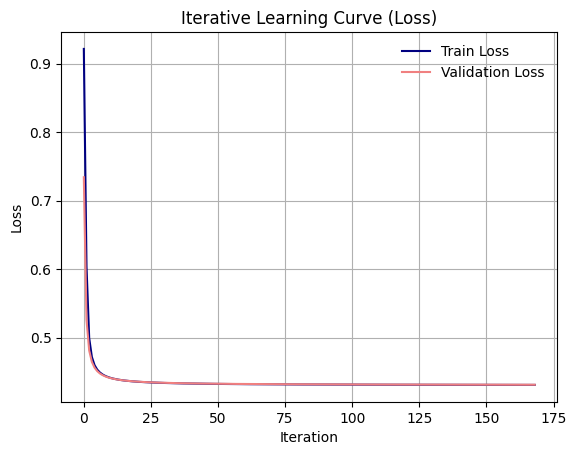

In [8]:
#10 Iterations
# plot the iterative learning curve (loss)
plt.plot(net.history[:, 'train_loss'], label='Train Loss', color='navy')
plt.plot(net.history[:, 'valid_loss'], label='Validation Loss', color='lightcoral')
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Iterative Learning Curve (Loss)")
plt.grid(visible=True)
plt.legend(frameon=False)

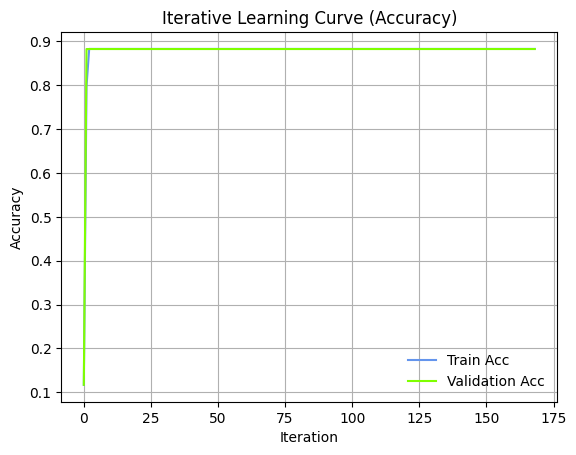

In [9]:
# plot the iterative learning curve (accuracy)
plt.plot(net.history[:, 'train_acc'], label='Train Acc', color='cornflowerblue')
plt.plot(net.history[:, 'valid_acc'], label='Validation Acc', color='chartreuse')
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.title("Iterative Learning Curve (Accuracy)")
plt.grid(visible=True)
plt.legend(frameon=False)


## Using sklearn learning curve with RO

In [42]:
from sklearn.model_selection import learning_curve

# Plot the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    net, X1.values.astype(np.float32), Y1.values.ravel().astype(np.int64), cv=3
)

train_scores_mean = train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
test_scores_mean = test_scores.mean(axis=1)
test_scores_std = test_scores.std(axis=1)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color='cyan')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color='darkorchid')
plt.plot(train_sizes, train_scores_mean, label="Training score", color='cyan')
plt.plot(train_sizes, test_scores_mean, label="Test score", color='darkorchid')
plt.title("Learning Curve")
plt.xlabel("Training size")
plt.ylabel("Score")
plt.grid(visible=True)
plt.legend(frameon=False)

  epoch    train_acc    train_loss    valid_acc    valid_loss     dur
-------  -----------  ------------  -----------  ------------  ------
      1       0.8833        0.6389       0.9000        0.6322  0.0030
      2       0.8833        0.6335       0.9000        0.6291  0.0029
      3       0.8833        0.6288       0.9000        0.6260  0.0029
      4       0.8833        0.6321       0.9000        0.6229  0.0030
      5       0.8833        0.6292       0.9000        0.6199  0.0030
      6       0.8833        0.6226       0.9000        0.6170  0.0027
      7       0.8833        0.6174       0.9000        0.6141  0.0043
      8       0.8833        0.6176       0.9000        0.6112  0.0028
      9       0.8833        0.6149       0.9000        0.6084  0.0066
     10       0.8833        0.6139       0.9000        0.6057  0.0026
     11       0.8833        0.6103       0.9000        0.6030  0.0026
     12       0.8833        0.6128       0.9000        0.6004  0.0031
     13       0.8833

     35       0.8833        0.5607       0.9000        0.5522  0.0037
     36       0.8833        0.5563       0.9000        0.5505  0.0062
     37       0.8833        0.5592       0.9000        0.5489  0.0029
     38       0.8833        0.5557       0.9000        0.5473  0.0032
     39       0.8833        0.5553       0.9000        0.5458  0.0027
     40       0.8833        0.5532       0.9000        0.5442  0.0029
     41       0.8833        0.5530       0.9000        0.5427  0.0027
     42       0.8833        0.5487       0.9000        0.5413  0.0027
     43       0.8833        0.5505       0.9000        0.5398  0.0030
     44       0.8833        0.5519       0.9000        0.5384  0.0024
     45       0.8833        0.5472       0.9000        0.5370  0.0027
     46       0.8833        0.5465       0.9000        0.5356  0.0030
     47       0.8833        0.5410       0.9000        0.5343  0.0026
     48       0.8833        0.5469       0.9000        0.5330  0.0028
     49       0.8833

## Using sklearn pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([
    ('scale', StandardScaler()),
    ('net', net),
])

pipe.fit(X1.values.astype(np.float32), Y1.values.ravel().astype(np.int64))
y_proba = pipe.predict_proba(X1.values.astype(np.float32))

Re-initializing module because the following parameters were re-set: activation, dropout_percent, hidden_layers, hidden_units, input_dim, output_dim.
Re-initializing criterion because the following parameters were re-set: weight.
Re-initializing optimizer.
  epoch    train_acc    train_loss    valid_acc    valid_loss     dur
-------  -----------  ------------  -----------  ------------  ------
      1       0.2568        0.6914       0.2641        0.6909  0.0527
      2       0.3102        0.6906       0.3061        0.6902  0.0524
      3       0.3625        0.6898       0.3304        0.6895  0.0518
      4       0.3743        0.6891       0.3624        0.6887  0.0527
      5       0.4086        0.6880       0.3757        0.6879  0.0511
      6       0.4233        0.6870       0.4265        0.6867  0.0524
      7       0.4612        0.6857       0.4376        0.6856  0.0569
      8       0.4811        0.6842       0.4475        0.6842  0.0514
      9       0.4871        0.6824       0.

## Using sklearn grid search

In [ ]:
from sklearn.model_selection import GridSearchCV

# deactivate skorch-internal train-valid split and verbose logging
net.set_params(train_split=False, verbose=0)

default_params = {
    'module__input_dim': [12],
    'module__output_dim': [2],
}

# module specific parameters need to begin with 'module__'
params = {
    'lr': [0.01, 0.02],
    'max_epochs': [10, 20],
    'module__hidden_units': [10, 20],
    **default_params,
}
gs = GridSearchCV(net, params, refit=False, cv=3, scoring='accuracy', verbose=2)

gs.fit(X, y)
print("best score: {:.3f}, best params: {}".format(gs.best_score_, gs.best_params_))

NameError: name 'X' is not defined

In [10]:


# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X1, Y1, test_size=0.1, random_state=21)

hidden_units_list = [1,5,10, 15]  # Different widths to test
train_accuracies = []
valid_accuracies = []
valid_aucs = []

for hidden_units in hidden_units_list:
    net = NeuralNetClassifier(
        module=BackpropModule,
        module__input_dim=X1.shape[1],
        module__output_dim=2,  # Assuming target is categorical
        module__hidden_units=hidden_units,
        module__hidden_layers=1,  # Fixed number of hidden layers
        max_epochs=20,  # Number of epochs for training
        verbose=0,  # Suppress verbose output for clarity
        callbacks=[
            EpochScoring(scoring='accuracy', name='train_acc', on_train=True),
            #EpochScoring(scoring='accuracy', name='valid_acc', lower_is_better=False),
            #EpochScoring(scoring='roc_auc', name='valid_auc', lower_is_better=False),
        ],
        criterion=nn.CrossEntropyLoss,
        optimizer=torch.optim.SGD,
        lr=0.5,
        iterator_train__shuffle=True,
    )

    net.fit(X1.values.astype(np.float32), Y1.values.ravel().astype(np.int64))

    train_acc = net.history[-1, 'train_acc']
    valid_acc = net.history[-1, 'valid_acc']
    train_accuracies.append(train_acc)
    valid_accuracies.append(valid_acc)
    print(f'Hidden units: {hidden_units}, Train Acc: {train_acc},Valid Acc: {valid_acc} ')

    

Hidden units: 1, Train Acc: 0.8830522532485485,Valid Acc: 0.8827865831183193 
Hidden units: 5, Train Acc: 0.8830522532485485,Valid Acc: 0.8827865831183193 
Hidden units: 10, Train Acc: 0.8830522532485485,Valid Acc: 0.8827865831183193 
Hidden units: 15, Train Acc: 0.8830522532485485,Valid Acc: 0.8827865831183193 


: 

In [ ]:
net.history

[{'batches': [{'train_loss': 0.9882130026817322, 'train_batch_size': 128},
   {'train_loss': 0.49303191900253296, 'train_batch_size': 128},
   {'train_loss': 0.39758503437042236, 'train_batch_size': 128},
   {'train_loss': 0.41578659415245056, 'train_batch_size': 128},
   {'train_loss': 0.44001591205596924, 'train_batch_size': 128},
   {'train_loss': 0.4707050919532776, 'train_batch_size': 128},
   {'train_loss': 0.4660722613334656, 'train_batch_size': 128},
   {'train_loss': 0.4699136018753052, 'train_batch_size': 128},
   {'train_loss': 0.42321330308914185, 'train_batch_size': 128},
   {'train_loss': 0.4577793478965759, 'train_batch_size': 128},
   {'train_loss': 0.42786705493927, 'train_batch_size': 128},
   {'train_loss': 0.43149587512016296, 'train_batch_size': 128},
   {'train_loss': 0.4028521776199341, 'train_batch_size': 128},
   {'train_loss': 0.42452019453048706, 'train_batch_size': 128},
   {'train_loss': 0.5006234049797058, 'train_batch_size': 16},
   {'valid_loss': 0.47411

In [ ]:
train_acc = net.history[-1, 'train_acc']
    valid_acc = net.history[-1, 'valid_acc']
    valid_auc = net.history[-1, 'valid_auc']
    
    train_accuracies.append(train_acc)
    valid_accuracies.append(valid_acc)
    valid_aucs.append(valid_auc)

    print(f'Hidden units: {hidden_units}, Train Acc: {train_acc}, Valid Acc: {valid_acc}, Valid AUC: {valid_auc}')

net.history

[{'batches': [{'train_loss': 0.8532590866088867, 'train_batch_size': 128},
   {'train_loss': 276.5985412597656, 'train_batch_size': 128},
   {'train_loss': 171.8120880126953, 'train_batch_size': 128},
   {'train_loss': 267.4521789550781, 'train_batch_size': 128},
   {'train_loss': 1190.329833984375, 'train_batch_size': 128},
   {'train_loss': 826.4951171875, 'train_batch_size': 128},
   {'train_loss': 520.3899536132812, 'train_batch_size': 128},
   {'train_loss': 495203.8125, 'train_batch_size': 128},
   {'train_loss': 4300234.0, 'train_batch_size': 128},
   {'train_loss': 1.3066996690190336e+16, 'train_batch_size': 128},
   {'train_loss': 2897407639552.0, 'train_batch_size': 128},
   {'train_loss': nan, 'train_batch_size': 128},
   {'train_loss': nan, 'train_batch_size': 128},
   {'train_loss': nan, 'train_batch_size': 128},
   {'train_loss': nan, 'train_batch_size': 16},
   {'valid_loss': nan, 'valid_batch_size': 128},
   {'valid_loss': nan, 'valid_batch_size': 128},
   {'valid_loss'

In [ ]:
train_acc = net.history[-1, 'train_acc']
    valid_acc = net.history[-1, 'valid_acc']
    #valid_auc = net.history[-1, 'valid_auc']
    
    train_accuracies.append(train_acc)
    #valid_accuracies.append(valid_acc)
    #valid_aucs.append(valid_auc)

    #print(f'Hidden units: {hidden_units}, Train Acc: {train_acc}, Valid Acc: {valid_acc}, Valid AUC: {valid_auc}')

plt.figure(figsize=(12, 6))
plt.plot(hidden_units_list, train_accuracies, label='Train Accuracy')
#plt.plot(hidden_units_list, valid_accuracies, label='Validation Accuracy')
#plt.plot(hidden_units_list, valid_aucs, label='Validation AUC')
plt.xlabel('Number of Hidden Units')
plt.ylabel('Score')
plt.title('Validation Curve for Different Neural Net Widths')
plt.legend()
plt.grid(True)
plt.show()